### Sel'kov Bifurcation - SR-T performance 
todo:  
simulation with D-CODE (sembra avere problemi di bloating, in caso provare ad aumentare parsimony)   
simulation with larger T  
rescale noise_level


C'è un problema nella stima della seconda equazione, SR-T sbaglia di grosso e le traiettorie vengono completamente sballate. L'unico caso in cui SR_T ha successo è per b=0.9.  
Nonostante l'RMSE sulla derivata (i.e. quello usato nell'ottimizzazione) sia simile al caso dell'equazione 1, in questo caso la ricostruzione risulta molto peggiore, capire perché.  
Magari usando trjecories più lunghe nel training (-> = più dati) si riescono ad ottenere performance migliori -> simulation with larger T  
RMK. D-CODE sembra funzionare meglio nella stima della seconda equazione nel caso parametrizzato su rho -> usare D-CODE

RMK. in generale l'errore sta incidendo di più in questo caso in cui le traiettorie sono più corte -> considerare di riscalare sigma=0.01 diversamente al variare di b in maniera che il problema abbia difficoltà costante   
Idea: standardize w.r.t. the length of the trajectory, to get a more precise estimation of the accuracy:
ex. using RMSE, SR-T performs worse in case 0.9 than 0.3, while looking at the trajectories is clear that SR-T performance in case 0.9 is better  
Idea: per scalare il livello di rumore usano il valore: self.std_base = 0.5641061, che magari è associato a b=0.75, cercare il valore appropriato per gli altri valori del parametro

--> chiedere a Paolo



In [1]:
# add the parent directory to the system path:
import sys
from pathlib import Path
parent_dir = Path('..').resolve() 
sys.path.append(str(parent_dir)) 

# import:
import numpy as np
import os
import matplotlib.pyplot as plt
from evaluation_trajectories import evaluation2D, evaluation2D_partial, evaluation2D_p, evaluation2D_partial_p

# seed:
np.random.seed(666)

In [2]:
# select the ODE:
ode_name_09 = 'SelkovODE_rho_09'
init_high_09 = [0.05, 0.05, 0.9]
init_low_09 = [0.05, 0.05, 0.9]

ode_name_06 = 'SelkovODE_rho_06'
init_high_06 = [0.05, 0.05, 0.6]
init_low_06 = [0.05, 0.05, 0.6]

ode_name_04 = 'SelkovODE_rho_04'
init_high_04 = [0.05, 0.05, 0.4]
init_low_04 = [0.05, 0.05, 0.4]

ode_name_03 = 'SelkovODE_rho_03'
init_high_03 = [0.05, 0.05, 0.3]
init_low_03 = [0.05, 0.05, 0.3]

ode_param=None
x_id = 0
freq = 10
n_sample = 50 
noise_ratio = 0.01
alg = 'diff'
seed = 0
n_seed = 5

### b = 0.9: 

5
0.6
[0.003941149372860089, 0.027371099533574517, 0.03654330309344889, 0.014235716324968712, 0.0007813254530469906]
0.016574518755579838


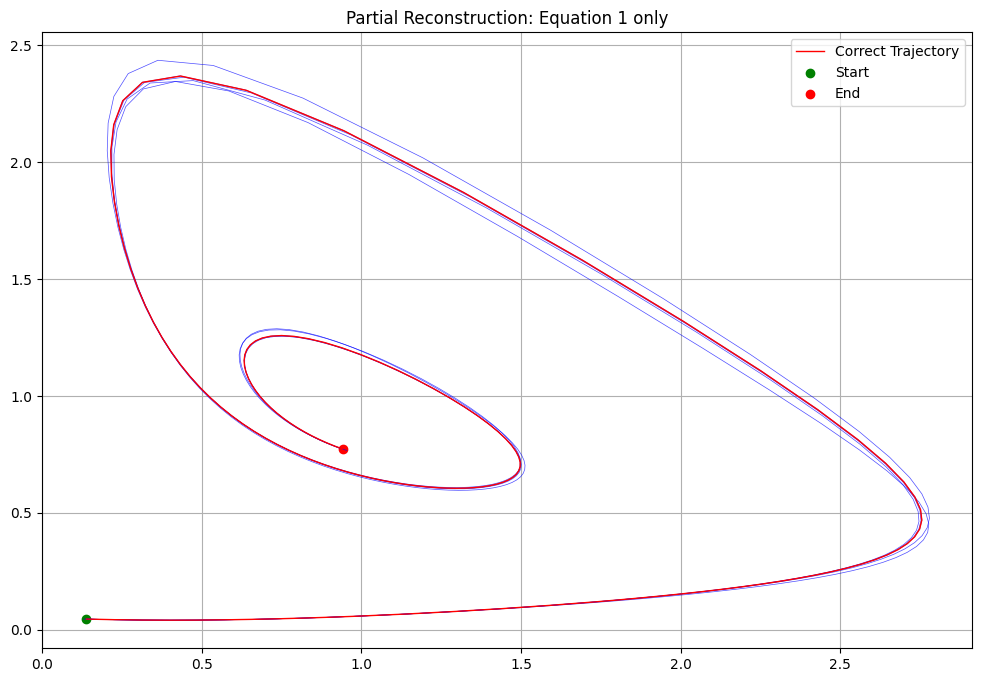

In [3]:
# Partial Reconstruction: Equation 1 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_09, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_09, init_low_09)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 1 only')
plt.legend()
plt.grid(True) 


5
0.8
[0.045620947130024354, 0.01345994330280512, 0.03119358381933542, 0.006145720221799029, 0.027802221880477283]
0.02484448327088824


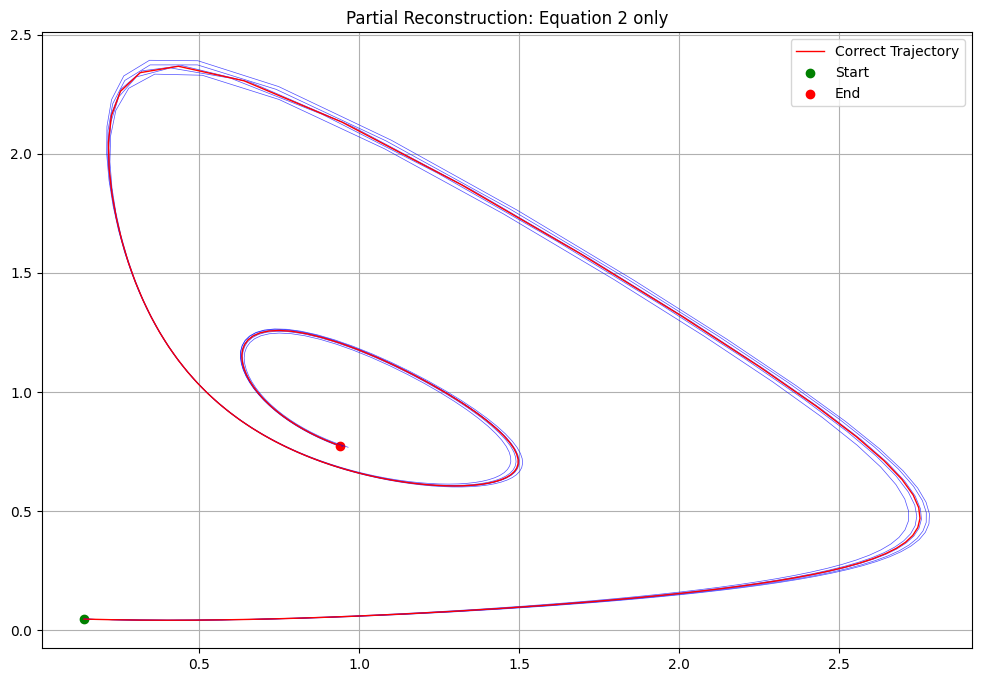

In [4]:
# Partial Reconstruction: Equation 2 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_09, ode_param, 1, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_09, init_low_09)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 2 only')
plt.legend()
plt.grid(True) 


5
0.6
0.8
[0.04219908074865657, 0.038282056272843645, 0.03286168652863565, 0.020007070793714894, 0.02708808205641978]
0.0320875952800541


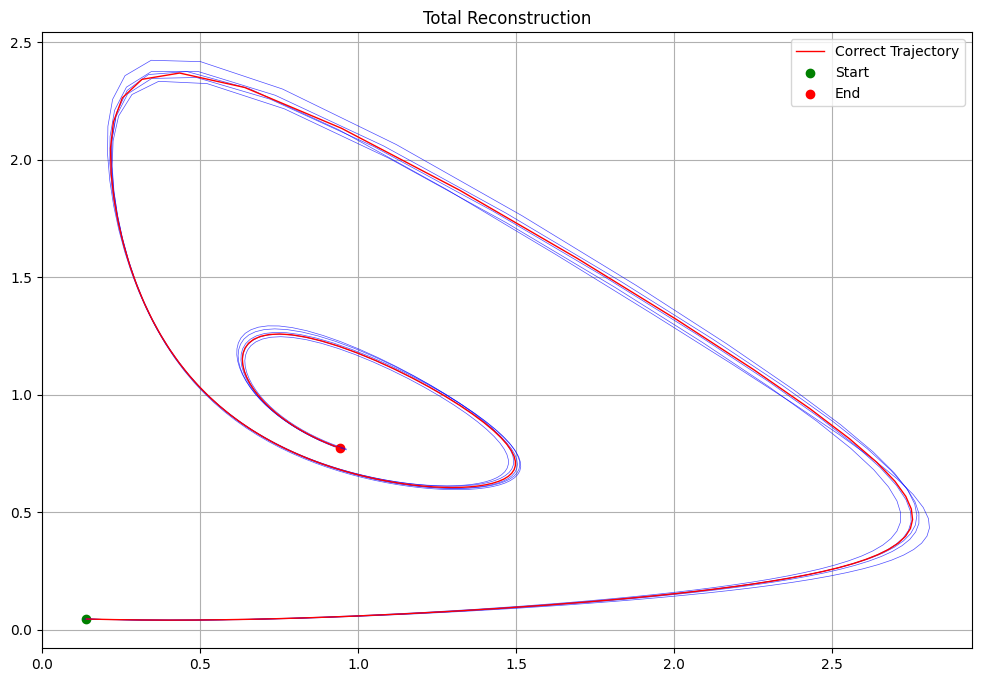

In [5]:
# Total Reconstruction
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_p(ode_name_09, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_09, init_low_09)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 


### b = 0.6:

5
0.8
[0.0033713759824005518, 0.014642639009049874, 0.0034935152701037323, 0.00823105756249487, 0.005905993913123131]
0.007128916347434433


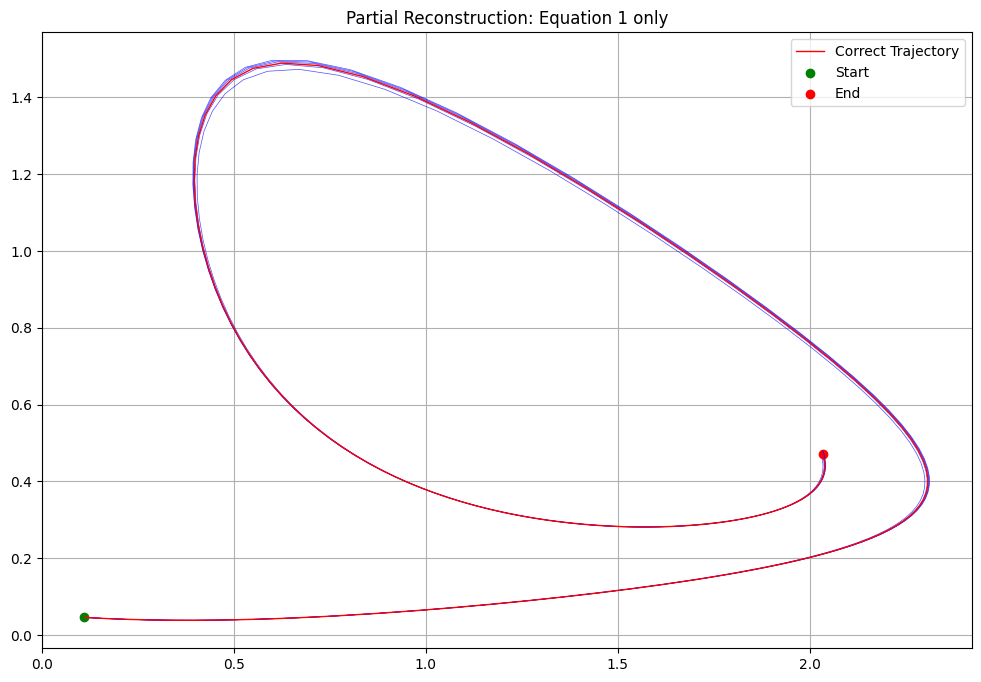

In [6]:
# Partial Reconstruction: Equation 1 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_06, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 1 only')
plt.legend()
plt.grid(True) 


5
0.2
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1188347494142D+02   r2 =  0.7559370518026D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1188347494142D+02   r2 =  0.7559370518026D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1188347494142D+02   r2 =  0.7559370518026D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1188347494142D+02   r2 =  0.5890737578448D-15
 lsoda--  warning..internal t 

/Users/grgromano/miniconda3/envs/d-code_grg/lib/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


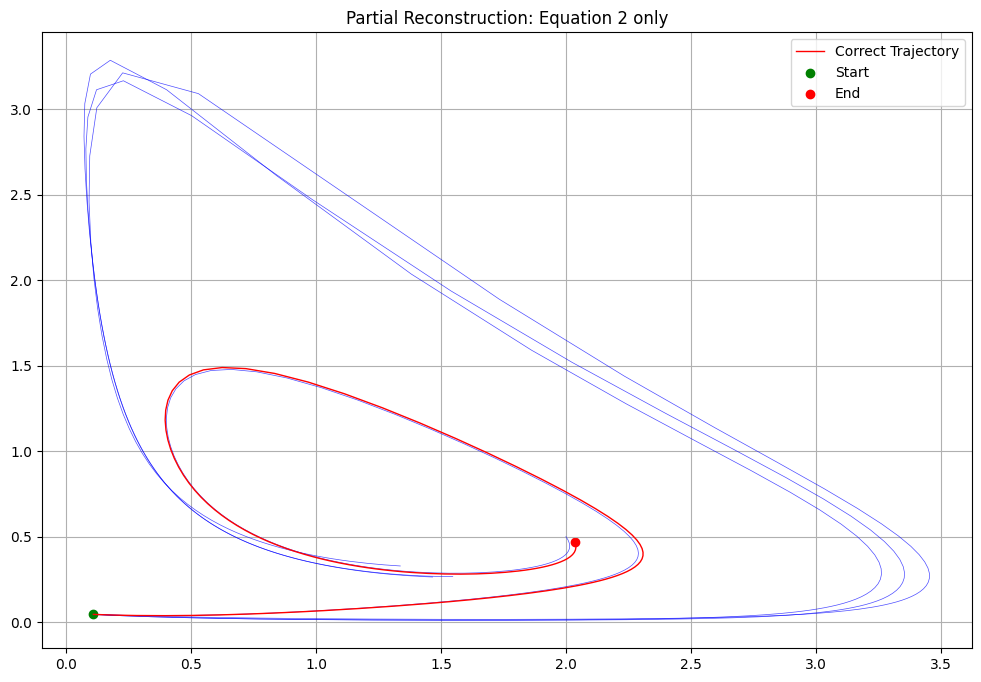

In [7]:
# Partial Reconstruction: Equation 2 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_06, ode_param, 1, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 2 only')
plt.legend()
plt.grid(True) 

5
0.8
0.2
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1184486360828D+02   r2 =  0.7343569957779D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1184486360828D+02   r2 =  0.7343569957779D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1184486360828D+02   r2 =  0.6062221371572D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1184486360828D+02   r2 =  0.6062221371572D-15
 lsoda--  warning..interna

/Users/grgromano/miniconda3/envs/d-code_grg/lib/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


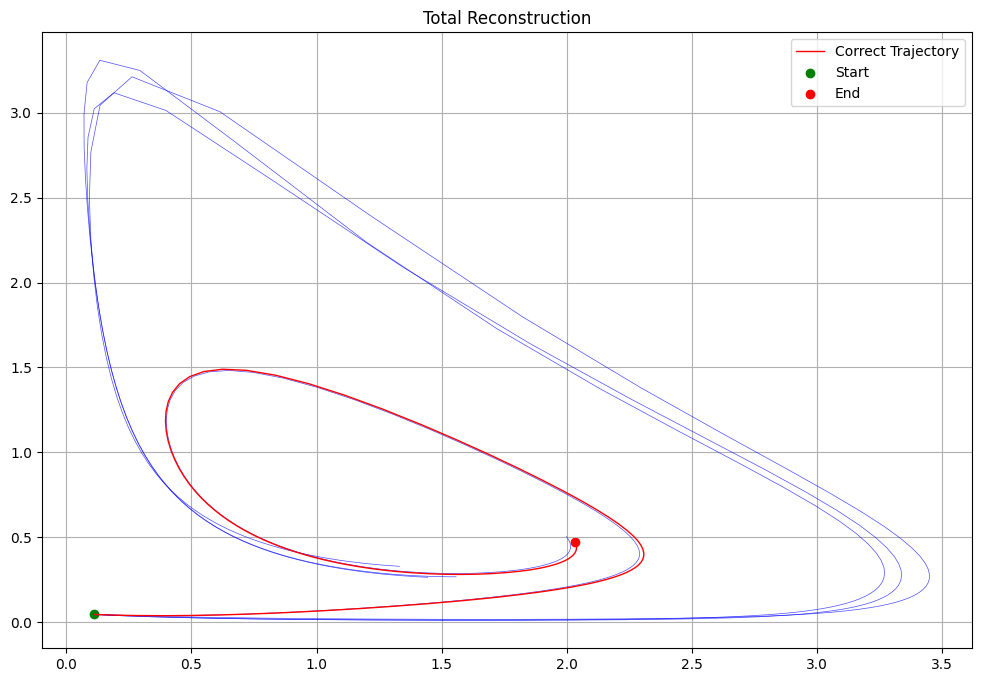

In [8]:
# Total Reconstruction:
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_p(ode_name_06, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 

### b = 0.4:

5
0.0
[0.07528728248533059, 0.020075260136172272, 0.03553288013904232, 0.07013060047644316, 0.023141270135568416]
0.044833458674511356


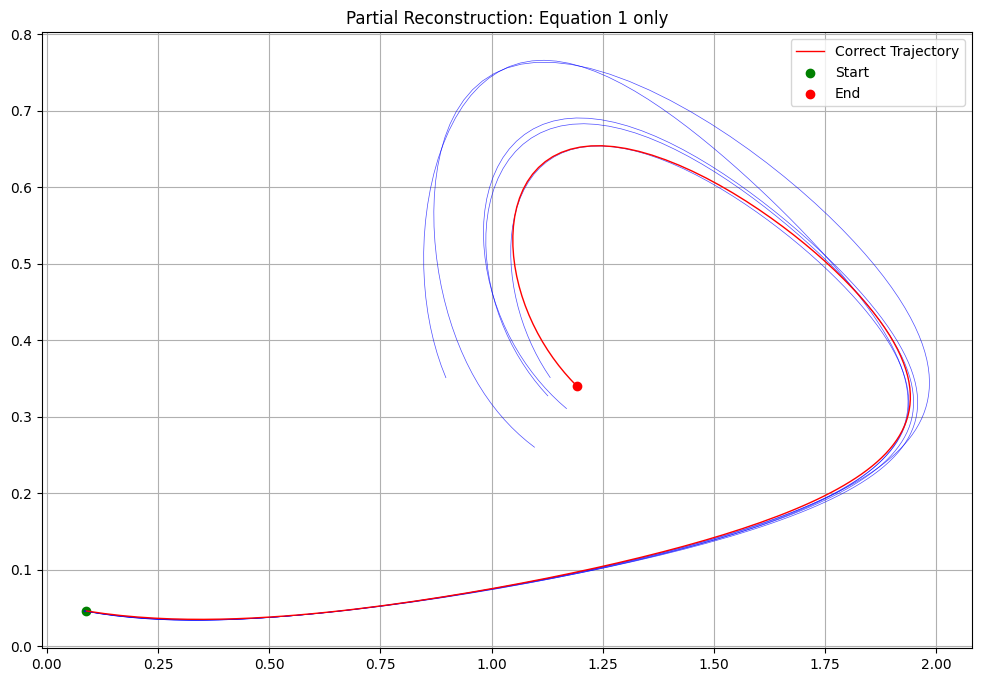

In [9]:
# Partial Reconstruction: Equation 1 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_04, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_04, init_low_04)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 1 only')
plt.legend()
plt.grid(True) 


5
0.0
[0.4325565197684108, 0.42613515611390196, 0.45434507621791503, 0.5476314230908242, 0.4448902347884612]
0.4611116819959026


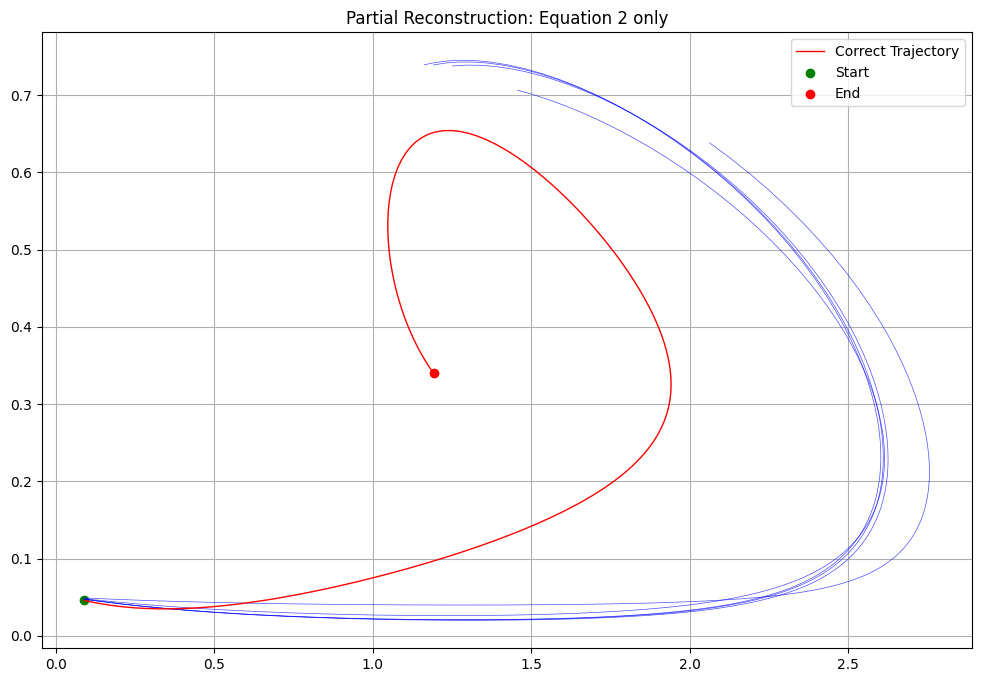

In [10]:
# Partial Reconstruction: Equation 2 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_04, ode_param, 1, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_04, init_low_04)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 2 only')
plt.legend()
plt.grid(True) 


5
0.0
0.0
[0.40659638901227074, 0.4111329119185416, 0.44464665382260754, 0.6045962607735993, 0.44114779411936667]
0.4616240019292771


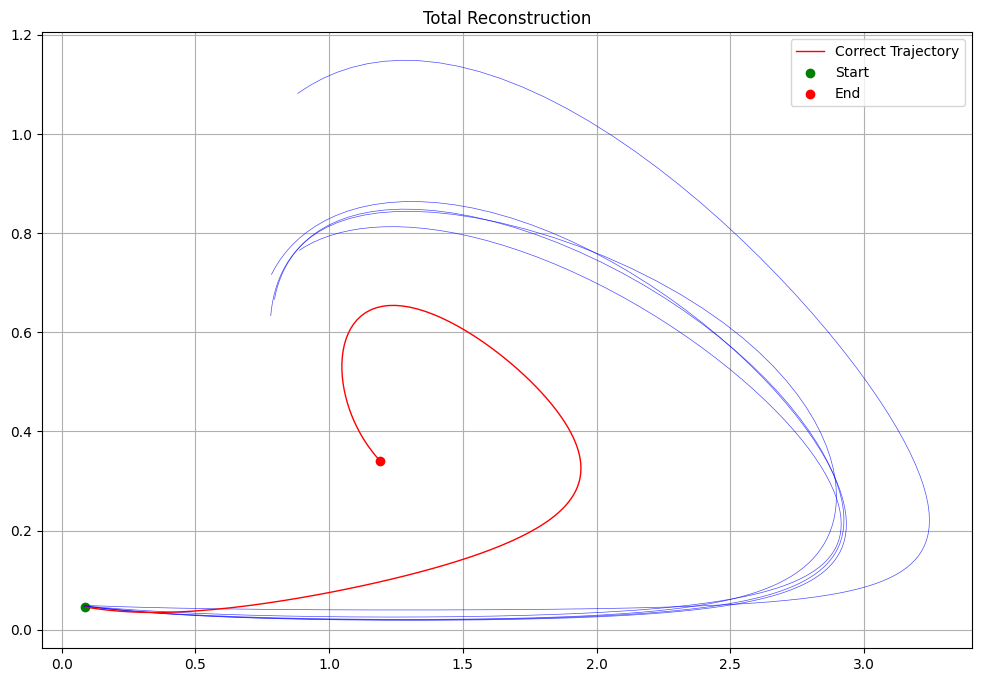

In [11]:
# Total Reconstruction
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_p(ode_name_04, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_04, init_low_04)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 


### b = 0.3:

5
0.0
[0.016350875266538403, 0.013360649671703024, 0.013518864891268197, 0.01580423743944446, 0.010526296353744972]
0.013912184724539811


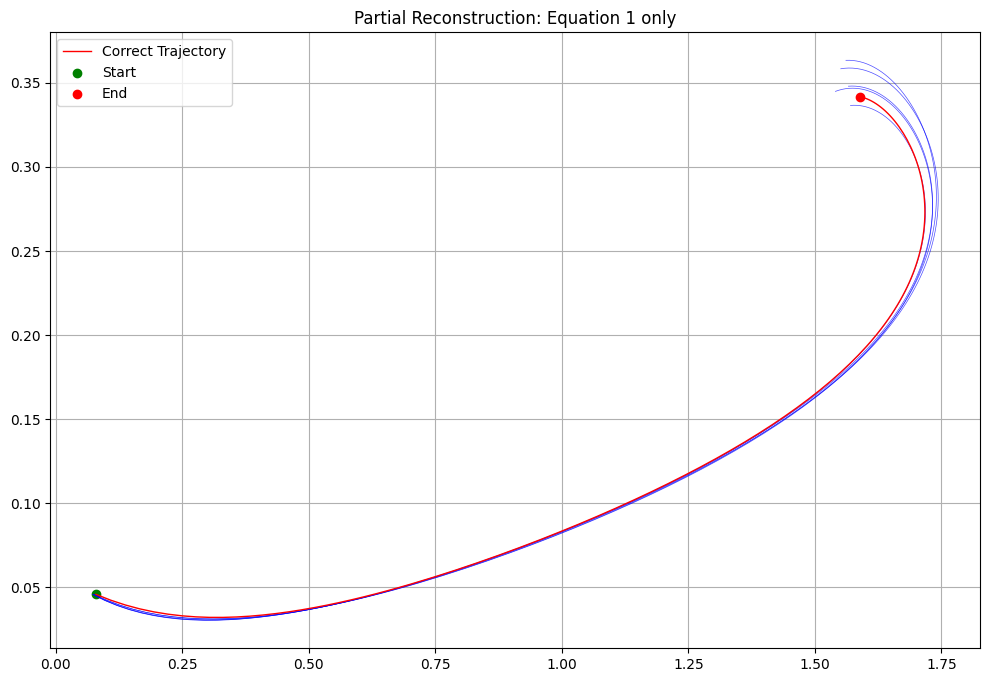

In [12]:
# Partial Reconstruction: Equation 1 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_03, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_03, init_low_03)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 1 only')
plt.legend()
plt.grid(True) 


5
0.0
[0.010519427646308864, 0.027321809133912064, 0.0642532005101242, 0.022015420342799692, 0.07120724864533655]
0.03906342125569627


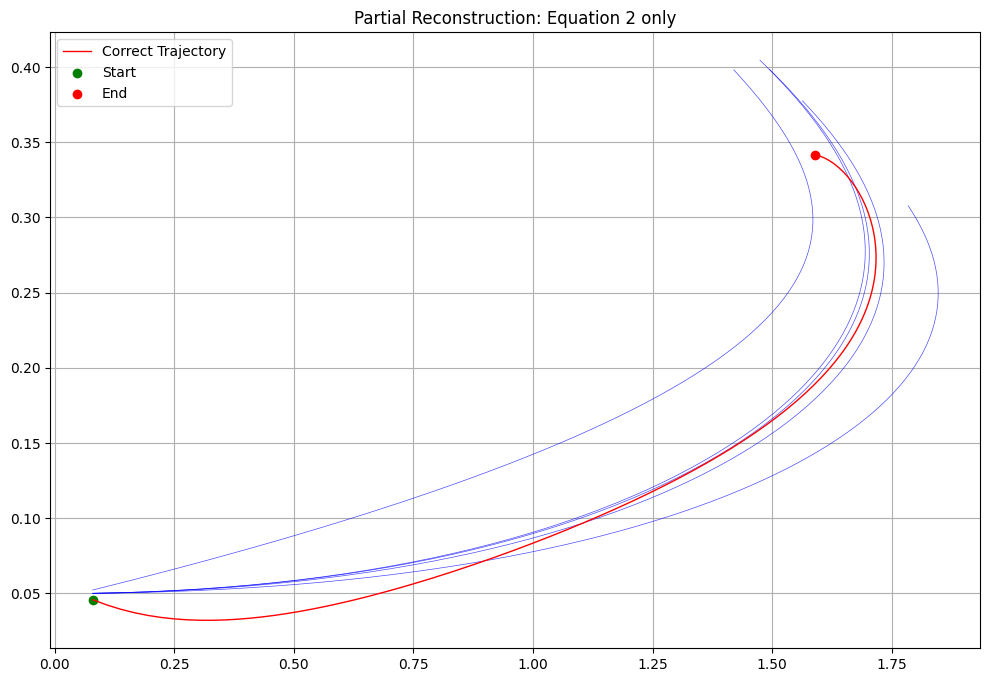

In [13]:
# Partial Reconstruction: Equation 2 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_03, ode_param, 1, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_03, init_low_03)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 2 only')
plt.legend()
plt.grid(True) 


5
0.0
0.0
[0.038698428723117684, 0.02699079398241544, 0.11607833603427109, 0.041450793650948614, 0.25470806117088846]
0.09558528271232826


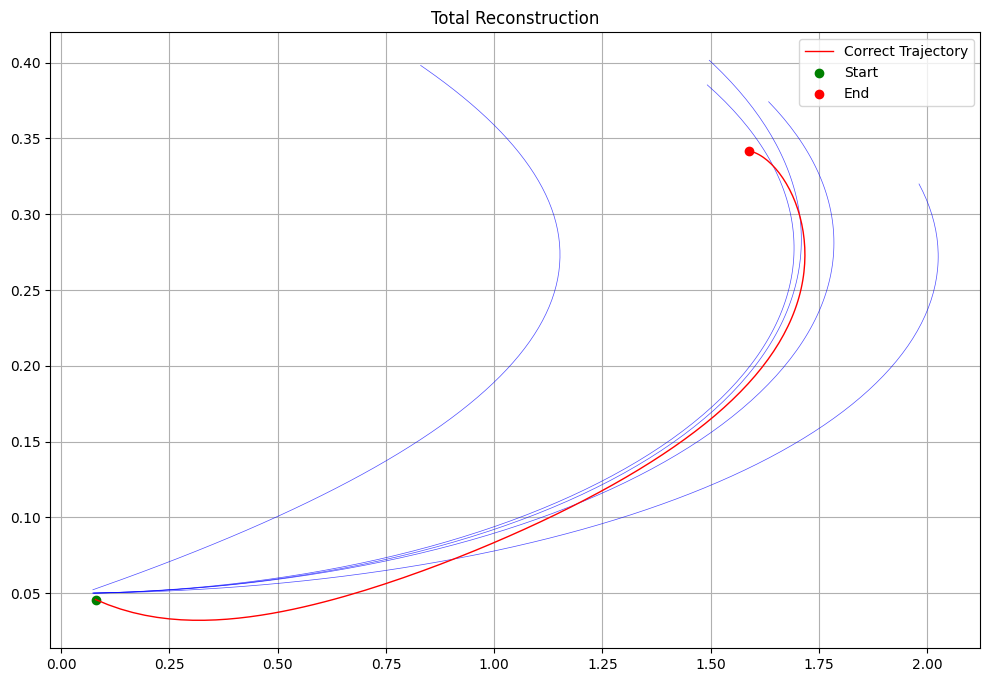

In [14]:
# Total Reconstruction
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_p(ode_name_03, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_03, init_low_03)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 
